## Import

In [2]:
%pip install pandas numpy matplotlib seaborn plotly scipy scikit-learn
%pip install --upgrade nbformat


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.graph_objects as go
from scipy.stats.mstats import winsorize
from pandas.plotting import scatter_matrix

## Read and visualize data

In [4]:
df = pd.read_csv("AAPL.csv")

In [5]:
DATA_COLUMNS = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]

In [6]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-07-28,194.669998,196.630005,194.139999,195.830002,194.795502,48291400
1,2023-07-31,196.059998,196.490005,195.259995,196.449997,195.412216,38824100
2,2023-08-01,196.240005,196.729996,195.279999,195.610001,194.576645,35175100
3,2023-08-02,195.039993,195.179993,191.850006,192.580002,191.562653,50389300
4,2023-08-03,191.570007,192.369995,190.690002,191.169998,190.160110,61235200


In [7]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])
fig.show()

array([[<Axes: xlabel='Open', ylabel='Open'>,
        <Axes: xlabel='High', ylabel='Open'>,
        <Axes: xlabel='Low', ylabel='Open'>,
        <Axes: xlabel='Close', ylabel='Open'>,
        <Axes: xlabel='Adj Close', ylabel='Open'>,
        <Axes: xlabel='Volume', ylabel='Open'>],
       [<Axes: xlabel='Open', ylabel='High'>,
        <Axes: xlabel='High', ylabel='High'>,
        <Axes: xlabel='Low', ylabel='High'>,
        <Axes: xlabel='Close', ylabel='High'>,
        <Axes: xlabel='Adj Close', ylabel='High'>,
        <Axes: xlabel='Volume', ylabel='High'>],
       [<Axes: xlabel='Open', ylabel='Low'>,
        <Axes: xlabel='High', ylabel='Low'>,
        <Axes: xlabel='Low', ylabel='Low'>,
        <Axes: xlabel='Close', ylabel='Low'>,
        <Axes: xlabel='Adj Close', ylabel='Low'>,
        <Axes: xlabel='Volume', ylabel='Low'>],
       [<Axes: xlabel='Open', ylabel='Close'>,
        <Axes: xlabel='High', ylabel='Close'>,
        <Axes: xlabel='Low', ylabel='Close'>,
        <Axes:

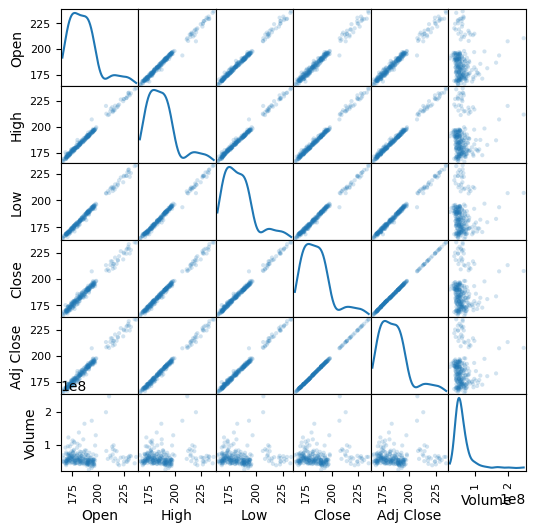

In [8]:
scatter_matrix(df, alpha = 0.2, figsize = (6, 6), diagonal = 'kde')

## Handle missing data

In [9]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Convert date to unix timestamp

In [11]:
def into_unix_timestamp(raw_date):
    parsed_date = datetime.strptime(raw_date, "%Y-%m-%d")
    return int(datetime.timestamp(parsed_date))

df['Date'] = df['Date'].map(into_unix_timestamp)

In [12]:
df.sort_values(by=['Date'], inplace=True)

## Handling skewness and outliers

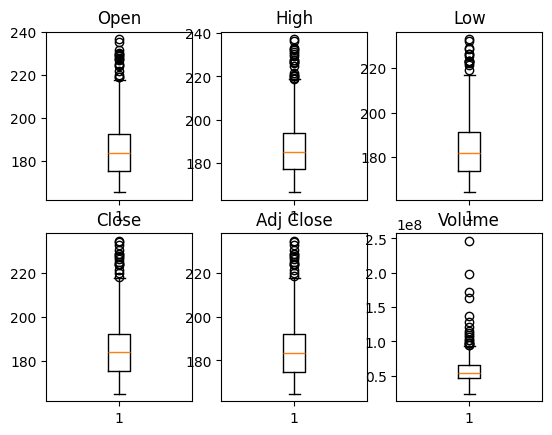

In [13]:
for i, column in enumerate(DATA_COLUMNS):
    plt.subplot(2, 3, i + 1)
    plt.title(column)
    plt.boxplot(df[column])
plt.show()

In [14]:
df.skew()

Date         0.006661
Open         1.257709
High         1.286698
Low          1.216382
Close        1.237254
Adj Close    1.253598
Volume       3.518806
dtype: float64

In [15]:
# Use box-cox transformation as suggested by https://machinelearningmastery.com/skewness-be-gone-transformative-tricks-for-data-scientists/

from sklearn.preprocessing import PowerTransformer, MinMaxScaler

box_cox_tranformer = PowerTransformer(method='box-cox', standardize=True)
min_max_scaler = MinMaxScaler()

df[DATA_COLUMNS] = box_cox_tranformer.fit_transform(df[DATA_COLUMNS])
df[DATA_COLUMNS] = min_max_scaler.fit_transform(df[DATA_COLUMNS])

In [16]:
# Handling outliers

df = df.apply(lambda s: winsorize(s, limits=[0.05, 0.05]), axis=0)

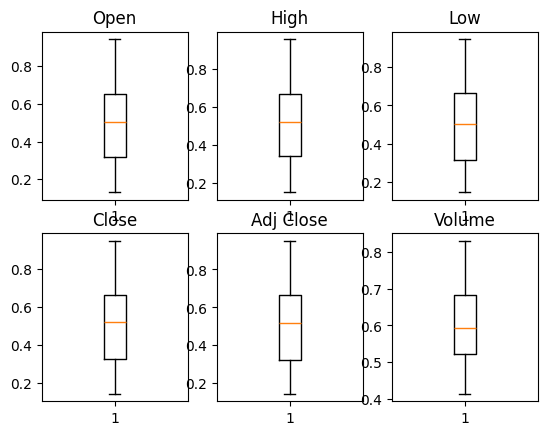

In [17]:
for i, column in enumerate(DATA_COLUMNS):
    plt.subplot(2, 3, i + 1)
    plt.title(column)
    plt.boxplot(df[column])
plt.show()

In [18]:
df.skew()

Date         0.007295
Open         0.143128
High         0.175040
Low          0.160686
Close        0.143873
Adj Close    0.155989
Volume       0.246993
dtype: float64

## Save data

In [19]:
df.to_csv("cleaned_data.csv")